In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [ ]:

df=pd.read_csv('world-happiness-report-2021.csv')

In [ ]:
df_happ=df[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Generosity','Perceptions of corruption']]

In [ ]:
df_happ.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption
0,7.842,10.775,0.954,72.0,-0.098,0.186
1,7.620,10.933,0.954,72.7,0.030,0.179
2,7.571,11.117,0.942,74.4,0.025,0.292
3,7.554,10.878,0.983,73.0,0.160,0.673
4,7.464,10.932,0.942,72.4,0.175,0.338


In [ ]:
c_names=['score', 'gdp', 'soc_support','life_exp','generosity','corruption']
df_happ.columns=c_names
df_happ['sq_support']=df_happ['soc_support']**2
df_happ['sq_life']=df_happ['life_exp']**2
df_happ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   score        149 non-null    float64
 1   gdp          149 non-null    float64
 2   soc_support  149 non-null    float64
 3   life_exp     149 non-null    float64
 4   generosity   149 non-null    float64
 5   corruption   149 non-null    float64
 6   sq_support   149 non-null    float64
 7   sq_life      149 non-null    float64
dtypes: float64(8)
memory usage: 9.4 KB


<ipython-input-230-8153903c7cc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happ['sq_support']=df_happ['soc_support']**2
<ipython-input-230-8153903c7cc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happ['sq_life']=df_happ['life_exp']**2


In [ ]:
#predict score by 5 independent variables
#KNN model
knn = neighbors.KNeighborsRegressor(n_neighbors=31)
knn_w=neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = df_happ[['gdp','sq_support','corruption','sq_life']]
Y = df_happ[['score']]
knn.fit(X, Y)
knn_w.fit(X,Y)
knn.score(X,Y)

0.659321061804141

In [ ]:
Y.describe()

,score
count,149.000000
mean,5.532839
std,1.073924
min,2.523000
25%,4.852000
50%,5.534000
75%,6.255000
max,7.842000


In [ ]:
#generating predictions
Y_=knn.predict(X)

In [ ]:
np.mean(np.abs((Y_-Y)))

score    0.51864
dtype: float64

In [ ]:
#validating
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -12.61 (+/- 10.91)
Weighted Accuracy: -17.51 (+/- 25.77)


In [ ]:
scores = cross_val_score(knn, X, Y, cv=5)
print(scores.mean(), ((Y-Y.mean())**2).sum())

-12.614464874252684 score    170.69015
dtype: float64


In [ ]:
((Y-Y_)**2).sum()

score    58.150539
dtype: float64

In [ ]:
1-((Y-Y_)**2).sum()/((Y-Y.mean())**2).sum()

score    0.659321
dtype: float64

In [ ]:
scores.mean()

-12.614464874252684

In [ ]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 90)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, X, Y, cv=5)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated accuracy')

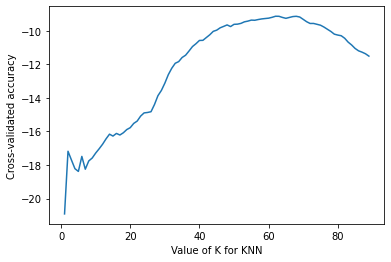

In [ ]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

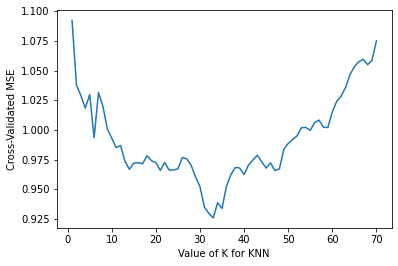

In [ ]:
k_range = range(1, 71)
k_scores = []
for k in k_range:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, Y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

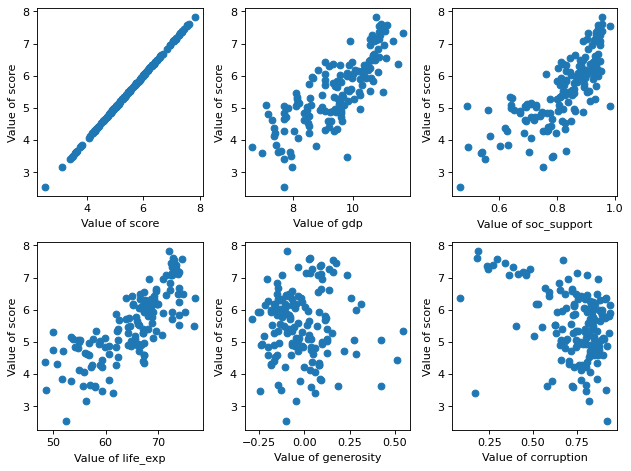

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
for idx, c in enumerate(c_names):
    plt.subplot(2,3,idx+1)
    plt.scatter(df_happ[c], df_happ['score'])
    plt.xlabel('Value of '+c  )
    plt.ylabel('Value of score')
plt.tight_layout()
plt.show()

<AxesSubplot:>

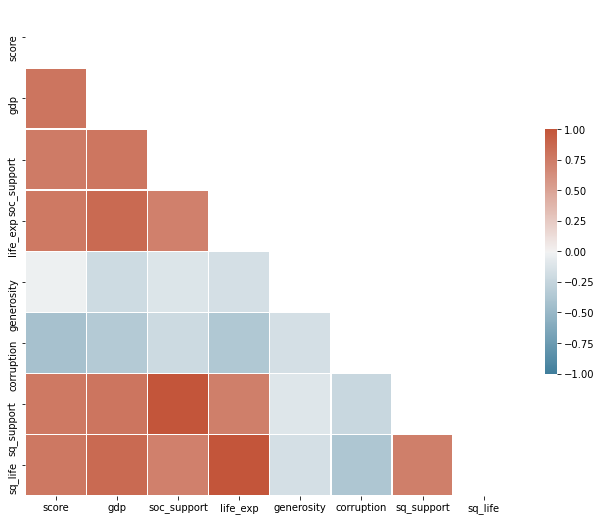

In [ ]:
# Compute the correlation matrix
corr = df_happ.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear regression

In [ ]:
import statsmodels.api as sm
# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     95.26
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.88e-39
Time:                        11:58:22   Log-Likelihood:                -125.17
No. Observations:                 149   AIC:                             260.3
Df Residuals:                     144   BIC:                             275.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4383      0.570      2.524      0.013       0.312       2.565
gdp            0.2066      0.092      2.257      0.026       0.026       0.388
sq_support     2.3232      0.446      5.210      0.000       1.442       3.205
corruption    -0.9868      0.284     -3.469      0.001      -1.549      -0.425
sq_life        0.0003      0.000      2.693      0.008    8.04e-05       0.001
==============================================================================
Omnibus:                        4.950   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.805
Skew:                          -0.440   Prob(JB):                       0.0905
Kurtosis:                       3.011   Cond. No.                     5.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumptions for linear regression

In [ ]:

predictions = results.predict(X)
errors = Y['score'] - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.573446816537215e-13


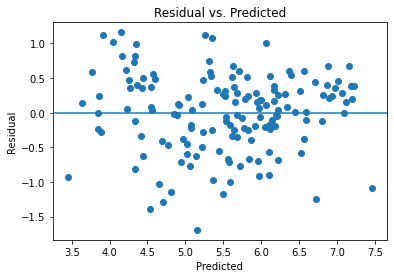

In [ ]:
#homoscedastisity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

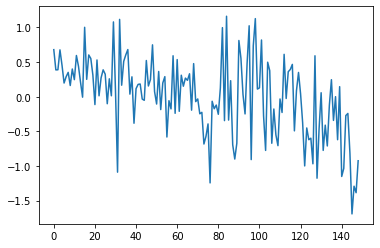

In [ ]:
#uncorrelated error terms
plt.plot(errors)
plt.show()

c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


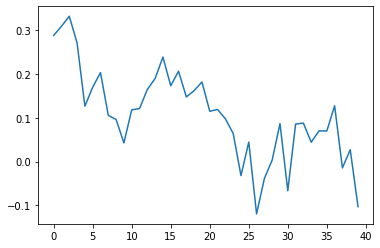

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

# the linear regression provided a better fit for the model